## Ticket to ride

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def show(img, size = (15,15), cmap = None):
    plt.figure(figsize = size)
    ax=plt.gca()
    ax.xaxis.tick_top() 
    plt.imshow(img, cmap)

Lets look at pictures which we have in RGB space:

Image size: (2546, 3846, 3)


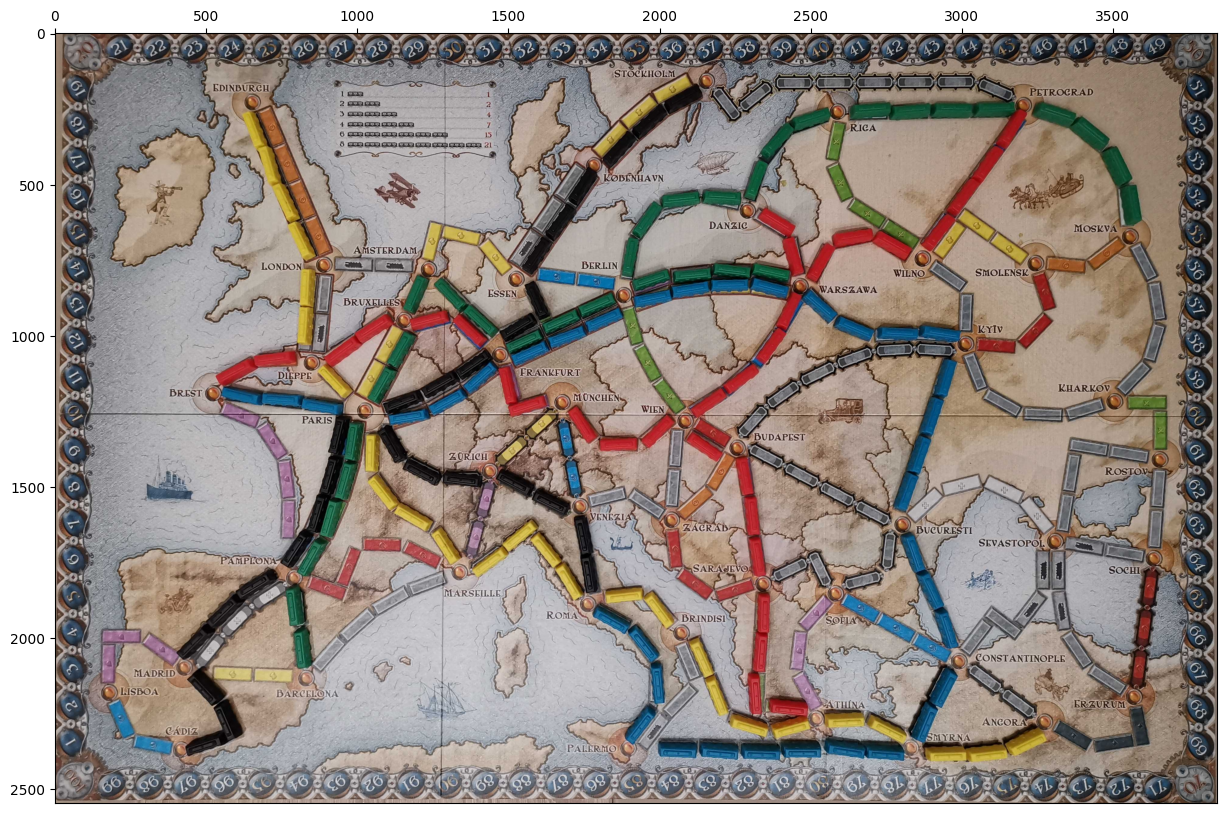

In [25]:
img_all_gbr = cv.imread("./train/all.jpg")

img_all_rgb = cv.cvtColor(img_all_gbr, cv.COLOR_BGR2RGB)

print("Image size:", img_all_rgb.shape)

show(img_all_rgb)

Let's look at the images of different red trailers and figure out what color they have:

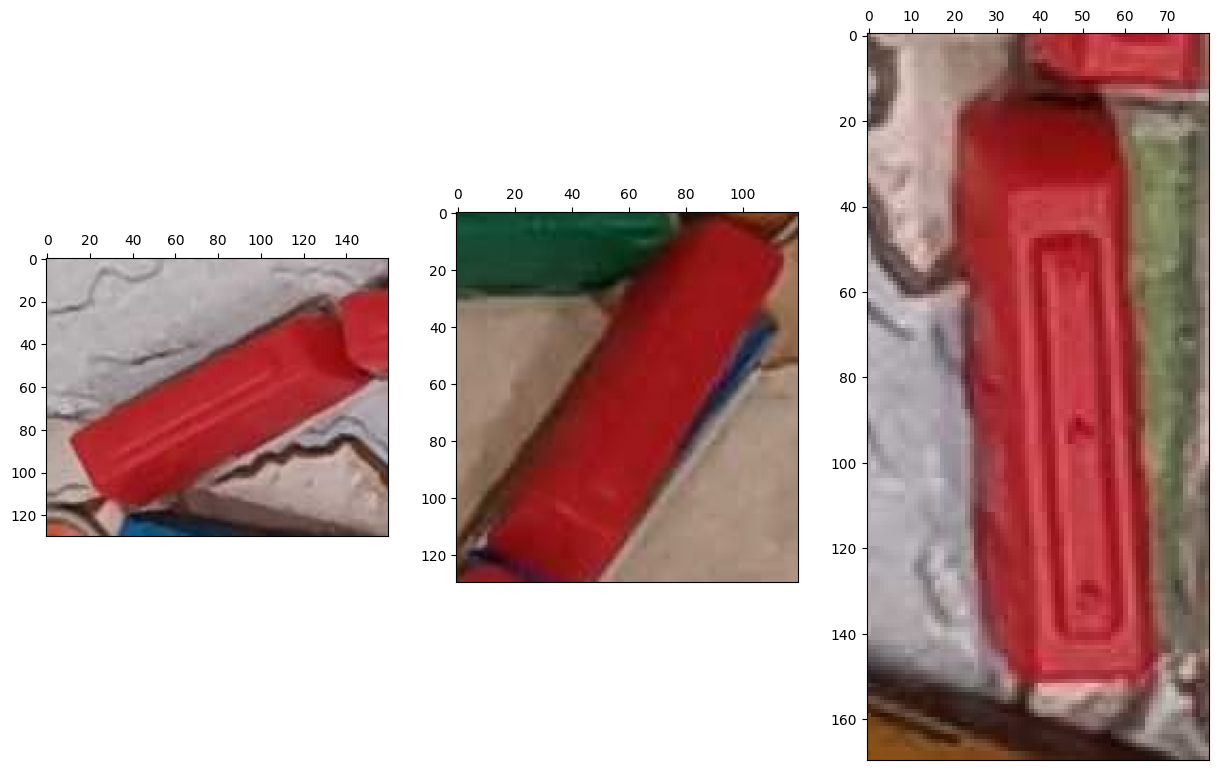

In [60]:
red_train_images_rgb = []
red_train_images_rgb.append(img_all_rgb[1050:1180, 520:680, :])
red_train_images_rgb.append(img_all_rgb[250:380, 3100:3220, :])
red_train_images_rgb.append(img_all_rgb[2100:2270, 2270:2350, :])

plt.figure(figsize=(15, 15))
plt.subplot(1,3,1)
plt.imshow(red_train_images_rgb[0])
ax=plt.gca()
ax.xaxis.tick_top() 
plt.subplot(1,3,2)
plt.imshow(red_train_images_rgb[1])
ax=plt.gca()
ax.xaxis.tick_top() 
plt.subplot(1,3,3)
plt.imshow(red_train_images_rgb[2])
ax=plt.gca()
ax.xaxis.tick_top() 
plt.show()

Lets use HSV color space, because it is easier to interpret for human and it will be easier to find desirable color bounds. We will choose different points from selected images and see thier HSV values. 

In [63]:
red_train_images_hsv = []
red_train_colors_hsv = []
for image in red_train_images_rgb:
    red_train_images_hsv.append(cv.cvtColor(image, cv.COLOR_RGB2HSV))

red_colors_hsv = []
red_colors_hsv.append(red_train_images_hsv[0][60, 100, :])
red_colors_hsv.append(red_train_images_hsv[1][60, 70, :])
red_colors_hsv.append(red_train_images_hsv[2][80, 45, :])
red_colors_hsv.append(red_train_images_hsv[1][40, 70, :])

print("Red colors in HSV space:", red_colors_hsv)

Red colors in HSV space: [array([178, 208, 180], dtype=uint8), array([179, 216, 157], dtype=uint8), array([178, 171, 200], dtype=uint8), array([179, 225, 146], dtype=uint8)]


Note that colours have approximately equal first component "HUE".

Mow it is time to isolate red trailers from the original image, based on the approximate color values in the HSV space that we found earlier:

In [108]:
def mask_red(img):
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    lower = np.array([175, 150, 130])
    upper = np.array([185, 240, 240])
    red_mask = cv.inRange(img_hsv, lower, upper)
    red_mask_3 = cv.cvtColor(red_mask, cv.COLOR_GRAY2RGB) 
    return red_mask_3

Mask shape: (2546, 3846, 3)


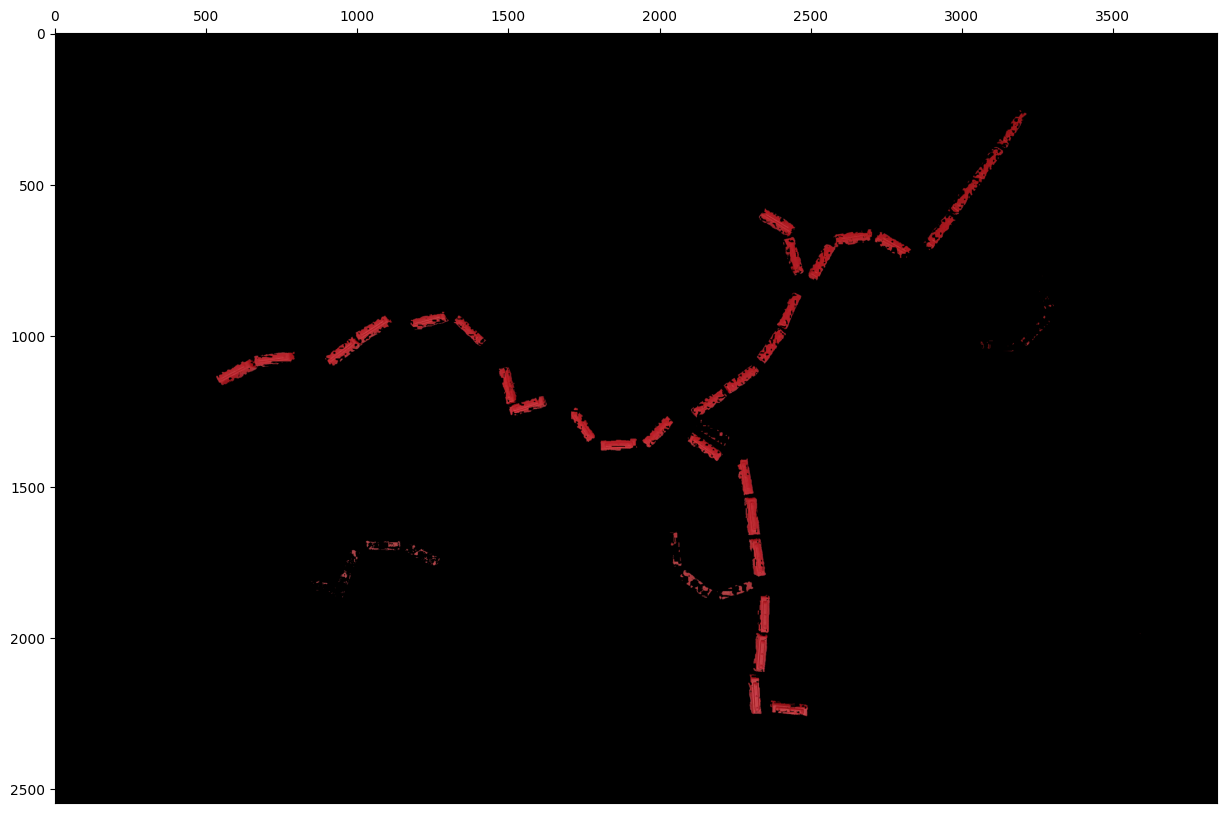

In [109]:
mask = mask_red(img_all_rgb)

print("Mask shape:", mask.shape)

red_trains_img = cv.bitwise_and(img_all_rgb, mask)

show(red_trains_img)

Lets look at closing and opening of obtained image, using erosion and dilation techniques.

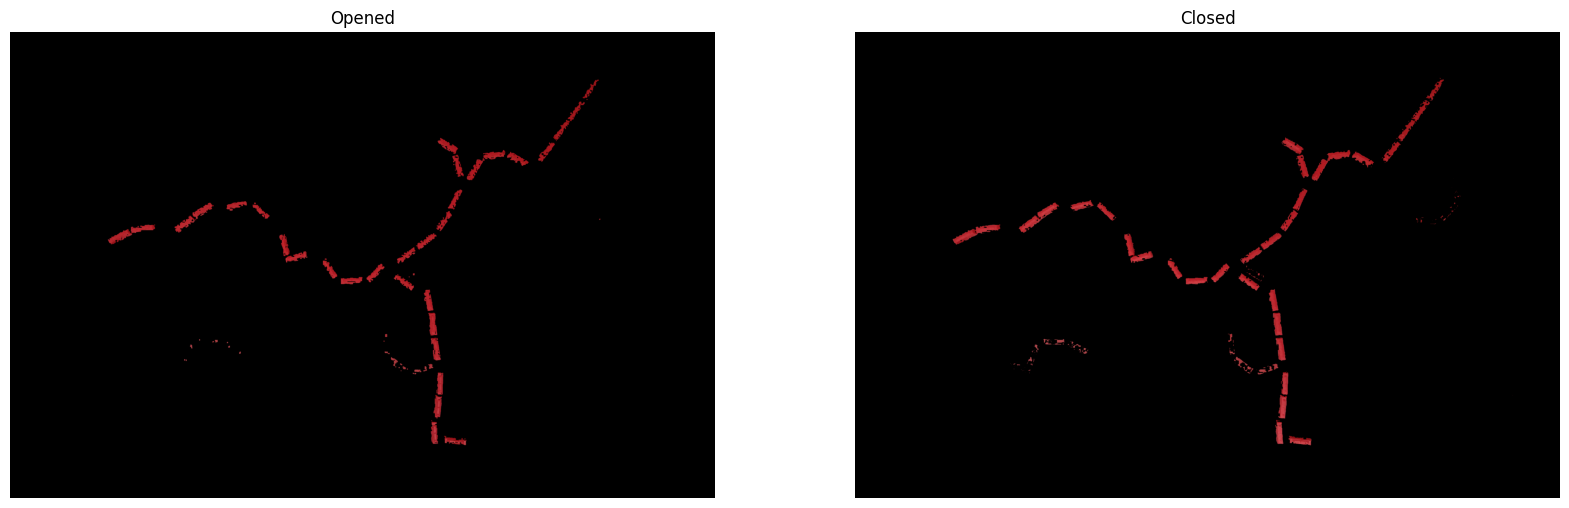

In [113]:
kernel = np.ones((5,5),np.uint8)

red_trains_opened = cv.morphologyEx(red_trains_img, cv.MORPH_OPEN, kernel)
red_trains_closed = cv.morphologyEx(red_trains_img, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
plt.title('Opened')
plt.imshow(red_trains_opened)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Closed')
plt.imshow(red_trains_closed)
plt.axis('off')
plt.show()

Probably, it would be better to apply several dilations and erosions. We also can play with kernes' sizes.

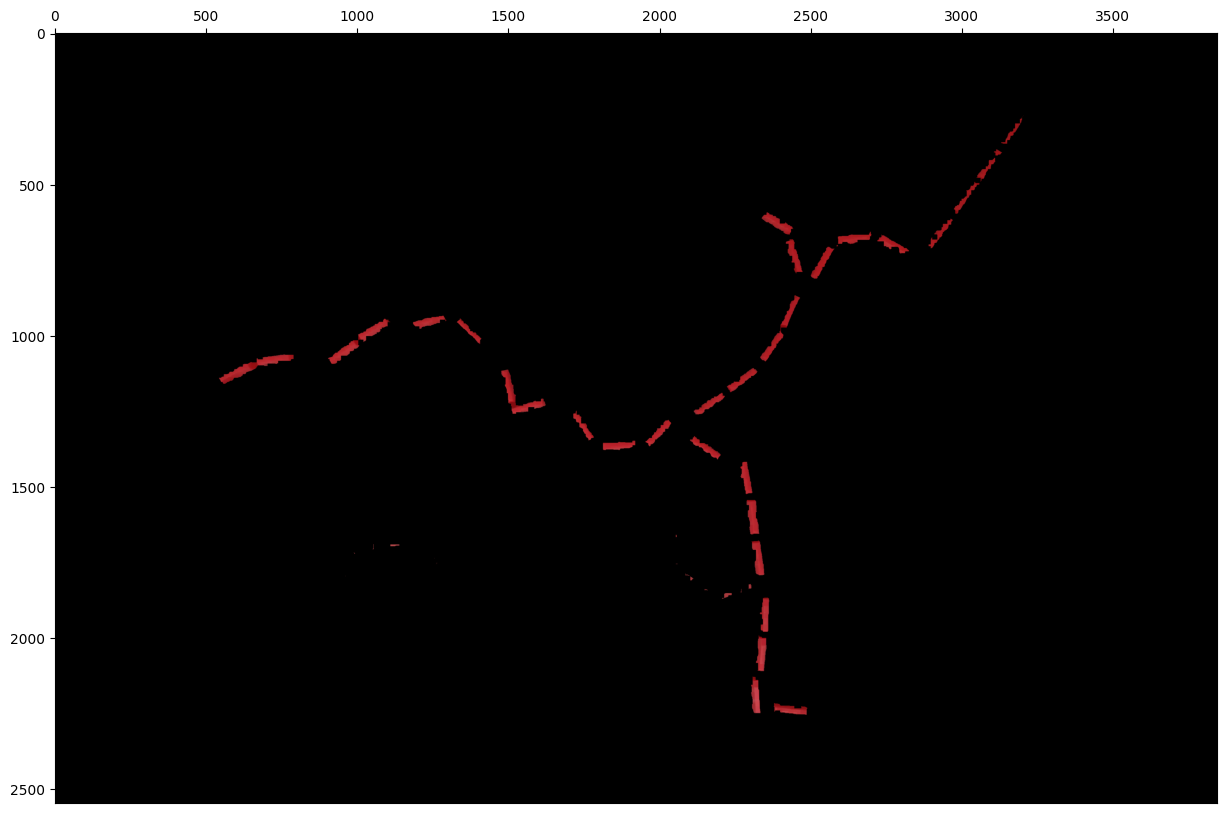

In [180]:
dilation_iterations = 3
erosion_iterations = 5

kernel_dilation = np.ones((3,3),np.uint8)
kernel_erosion = np.ones((4,4),np.uint8)

red_trains_dilated = cv.dilate(red_trains_img, kernel_dilation, iterations = dilation_iterations)
red_trains_erosed = cv.erode(red_trains_dilated, kernel_erosion, iterations = erosion_iterations)


show(red_trains_erosed)